In [1]:
# import gurobi and numpy
from gurobipy import *
import numpy as np
from numpy import genfromtxt

# load data
train = genfromtxt('LRTrain.csv', delimiter=',', skip_header = 1)
test = genfromtxt('LRTest.csv', delimiter=',', skip_header = 1)

feat_train = train[:, :-1]
label_train = train[:, -1]
feat_test = test[:, :-1]
label_test = test[:, -1]


Overall, I found that the original step size of 0.00001 and max iterations of 2000 yeilded a suboptimal solution. In order to find the optimal solution, I repeatedley decreased epsilon (the termination criterion related to the norm of the gradient) and adjusted gamma (the step size) to ensure convergence.

Training logistic regression classifier:

In [104]:
# number of samples
n = 300
# number of features
d = 30
# step size
gamma = 0.00003
# set threshold on norm of gradient
epsilon = 0.1

# set initial weights
w = np.zeros(d)
# initialize gradient value
total_grad = 0


# function to compute gradient
def compute_grad(w, feat_train, label_train):
    
    # initialize dimensions
    n = len(feat_train)
    d = len(w)
    # initialize gradient vector
    grad_sum = np.zeros(d)
    
    # compute gradient across all data
    for i in range(n):
        
        x_i = feat_train[i]
        y_i = label_train[i]
        num = 1
        denom = 1 + np.exp(-1 * np.dot(w, x_i))
        to_add = ((num / denom) - y_i) * x_i
        grad_sum += to_add
    
    # normalize gradient
    grad = grad_sum / n
    
    return grad

# track gradient norms and number of iterations for plotting purposes
gradient_norms = []
num_iter = 0

# do first step of gradient descent (since intial vector w of all zeros won't enter the loop)
grad = compute_grad(w, feat_train, label_train)
gradients.append(grad)
w = w - gamma * grad

# implement gradient descent to compute w
while np.linalg.norm(grad) > epsilon:
    grad = compute_grad(w, feat_train, label_train)
    gradient_norms.append(np.linalg.norm(grad))
    w = w - gamma * grad
    num_iter += 1
    

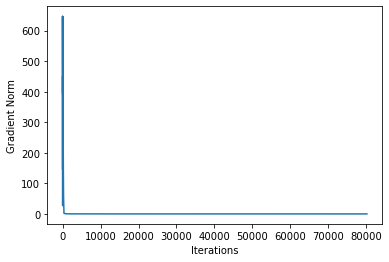

In [113]:
import matplotlib.pyplot as plt
x_iter = [i for i in range(num_iter)]
plt.plot(x_iter, gradient_norms)
plt.xlabel('Iterations')
plt.ylabel('Gradient Norm')
plt.show()


In [116]:
# set display option for pandas dataframe
import pandas as pd
pd.set_option("display.precision", 4)


In [117]:
# define function to compute probability of a given observation
def logistic_regression(w, x_i):
    "Return P(y = 1) given some weight vector w and observation x_i"
    prob = 1 / (1 + np.exp(-1 * np.dot(w, x_i)))
    return prob

# track rows of info to display into dataframe at end
row_list = []

# count total number of positives and negatives
labels = np.unique(label_test, return_counts = True)
counts = labels[1]
total_neg = counts[0]
total_pos = counts[1]

# initialize list of thresholds
thresholds = [i/10 for i in range(11)]

# repeat tp/fp calculation for each threshold
for thrs in thresholds:
    tp, fp = 0, 0
    # calculate a probability for each observation
    for i, obs in enumerate(feat_test):
        # compute probability
        prob = logistic_regression(w, obs)
        # assign predicted label
        y_pred = 1 if prob > thrs else 0
        # assign true label label
        y_true = label_test[i]
        
        # track true positives and false positives
        if y_pred == 1 and y_true == 1:
            tp += 1
        
        elif y_pred == 1 and y_true == 0:
            fp += 1
    
    # compute tpr/fpr/tnr/fnr
    tpr = tp / total_pos
    fpr = fp / total_neg
    tnr = 1 - fpr
    fnr = 1 - tpr
    
    # assemble row entry and add to row list
    row = {'t': thrs, 'TPR': tpr, 'FPR': fpr, 'TNR': tnr, 'FNR': fnr}
    row_list.append(row)

# create table with row list, display
df_result = pd.DataFrame(row_list)
df_result
        

,t,TPR,FPR,TNR,FNR
0,0.0,1.0000,1.0000,0.0000,0.0000
1,0.1,0.9898,0.2339,0.7661,0.0102
2,0.2,0.9490,0.1462,0.8538,0.0510
3,0.3,0.9286,0.1111,0.8889,0.0714
4,0.4,0.9082,0.0526,0.9474,0.0918
5,0.5,0.8980,0.0351,0.9649,0.1020
6,0.6,0.8776,0.0292,0.9708,0.1224
7,0.7,0.8469,0.0175,0.9825,0.1531
8,0.8,0.8265,0.0117,0.9883,0.1735
9,0.9,0.7959,0.0058,0.9942,0.2041
